# 6. Linear Regression with PyTorch
## 1. About Linear Regression


### 1.1 Simple Linear Regression Basics
- Allows us to understand **relationship** between two **continuous variables**
- Example
    - x: independent variable
        - weight
    - y: dependent variable
        - height
- $y = \alpha x + \beta$

### 1.2 Example of simple linear regression

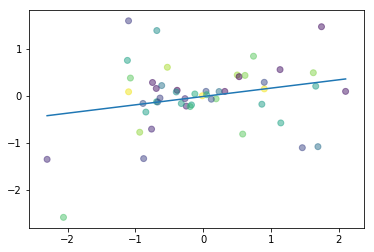

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

### 1.3 Aim of Linear Regression
- Minimize the distance between the points and the line ($y = \alpha x + \beta$)
- Adjusting
    - Coefficient: $\alpha$
    - Bias/intercept: $\beta$

## 2. Building a Linear Regression Model with PyTorch

### 2.1 Example
- Coefficient: $\alpha = 2$
- Bias/intercept: $\beta = 1$
- Equation: $y = 2x + 1$

### 2.2 Building a Toy Dataset

In [2]:
x_values = [i for i in range(11)]

In [3]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [5]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

$y = 2x + 1$

In [6]:
y_values = [2*i + 1 for i in x_values]

In [7]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [8]:
# In case you're weak in list iterators...
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result) 

In [9]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [10]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [11]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

### 2.3 Building Model

**Critical Imports**

In [12]:
import torch
import torch.nn as nn

**Create Model**
1. Linear model
    - True Equation: $y = 2x + 1$
2. Forward
    - Example
        - Input $x = 1 $
        - Output $\hat y = ?$

In [13]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

**Instantiate Model Class**
- input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [14]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

**Instantiate Loss Class**
- MSE Loss: Mean Squared Error
- $MSE = \frac{1}{n} \sum_{i=1}^n(\hat y_i - y_i)$
    - $\hat y$: prediction
    - $y$: true value

In [15]:
criterion = nn.MSELoss()

**Instantiate Optimizer Class**
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
        - parameters: $\alpha$ and $\beta$ in $ y = \alpha x + \beta$
        - desired parameters: $\alpha = 2$ and $\beta = 1$ in $ y = 2x + 1$

In [16]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Train Model**
- 1 epoch: going through the whole x_train data once
    - 100 epochs: 
        - 100x mapping `x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`
        
- Process 
    1. Convert inputs/labels to tensors with gradients
    2. Clear gradient buffets
    3. Get output given inputs 
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [17]:
epochs = 100

In [18]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 206.09994506835938
epoch 2, loss 17.4328556060791
epoch 3, loss 2.0369279384613037
epoch 4, loss 0.7742648720741272
epoch 5, loss 0.6644824743270874
epoch 6, loss 0.6488132476806641
epoch 7, loss 0.6408949494361877
epoch 8, loss 0.6336832046508789
epoch 9, loss 0.6266022324562073
epoch 10, loss 0.6196050643920898
epoch 11, loss 0.6126856207847595
epoch 12, loss 0.6058441400527954
epoch 13, loss 0.5990791320800781
epoch 14, loss 0.5923890471458435
epoch 15, loss 0.5857741832733154
epoch 16, loss 0.5792327523231506
epoch 17, loss 0.5727642774581909
epoch 18, loss 0.5663685202598572
epoch 19, loss 0.5600440502166748
epoch 20, loss 0.5537900924682617
epoch 21, loss 0.5476058125495911
epoch 22, loss 0.5414910316467285
epoch 23, loss 0.5354437828063965
epoch 24, loss 0.529464840888977
epoch 25, loss 0.523552656173706
epoch 26, loss 0.5177060961723328
epoch 27, loss 0.5119249224662781
epoch 28, loss 0.506208062171936
epoch 29, loss 0.5005552768707275
epoch 30, loss 0.49496617913

**Compare Data**

In [19]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.11660784],
       [ 2.2438242 ],
       [ 4.3710403 ],
       [ 6.4982567 ],
       [ 8.625473  ],
       [10.752689  ],
       [12.879906  ],
       [15.007122  ],
       [17.134338  ],
       [19.261555  ],
       [21.388771  ]], dtype=float32)

In [20]:
# y = 2x + 1 
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

**Plot Graph**

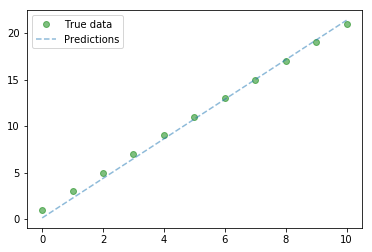

In [21]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

**Save Model**

In [22]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

**Load Model**

In [23]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

## 3. Building a Linear Regression Model with PyTorch (GPU)



**CPU Summary**

In [24]:
import torch
import torch.nn as nn

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()

GPU: 2 things must be on GPU
- `model`
- `tensors with gradients`

In [26]:
import torch
import torch.nn as nn
import numpy as np

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    
    #######################
    #  USE GPU FOR MODEL  #
    #######################
    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Logging
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 182.10244750976562
epoch 2, loss 14.857756614685059
epoch 3, loss 1.2160905599594116
epoch 4, loss 0.10333549976348877
epoch 5, loss 0.012525424361228943
epoch 6, loss 0.0050725750625133514
epoch 7, loss 0.004419471137225628
epoch 8, loss 0.004321437329053879
epoch 9, loss 0.004269206430763006
epoch 10, loss 0.0042212288826704025
epoch 11, loss 0.004174049943685532
epoch 12, loss 0.004127446096390486
epoch 13, loss 0.004081346560269594
epoch 14, loss 0.004035779740661383
epoch 15, loss 0.0039907051250338554
epoch 16, loss 0.003946132026612759
epoch 17, loss 0.003902057185769081
epoch 18, loss 0.003858497366309166
epoch 19, loss 0.0038154181092977524
epoch 20, loss 0.0037728033494204283
epoch 21, loss 0.003730679862201214
epoch 22, loss 0.003689020872116089
epoch 23, loss 0.003647817764431238
epoch 24, loss 0.0036070935893803835
epoch 25, loss 0.003566815285012126
epoch 26, loss 0.0035269916988909245
epoch 27, loss 0.003487611887976527
epoch 28, loss 0.003448643023148179
e

In [28]:
device

device(type='cpu')

# Summary

- Simple **linear regression basics**
    - $y = Ax + B$
    - $y = 2x + 1$
- **Example** of simple linear regression
- **Aim** of linear regression
    - Minimizing distance between the points and the line
        - Calculate "distance" through `MSE`
        - Calculate `gradients`
        - Update parameters with `parameters = parameters - learning_rate * gradients`
        - Slowly update parameters $A$ and $B$ model the linear relationship between $y$ and $x$ of the form $y = 2x + 1$
- Built a linear regression **model** in **CPU and GPU**
    - Step 1: Create Model Class
    - Step 2: Instantiate Model Class
    - Step 3: Instantiate Loss Class
    - Step 4: Instantiate Optimizer Class
    - Step 5: Train Model
- Important things to be on **GPU**
    - `model`
    - `tensors with gradients`
- How to bring to **GPU**?
    - `model_name.cuda()`
    - `variable_name.cuda()`